In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import math
import copy 
from matplotlib.gridspec import GridSpec

plt.style.use('seaborn')

In [16]:
def phase(s):
    angle=[]
    for i in range(len(s)):
        angle.append(math.atan(s.imag[i]/s.real[i]))
        
    return angle

## 1. Single Frequency:
### 1.1. Taking FFT for a 5Hz signal (N = 100) as the real component. 

In [17]:
N = 1000

f1 = 5
t = np.linspace(0, 1, N)
s = np.sin(f1 * 2 * np.pi * t)

fft1 = np.fft.fftshift(np.fft.fft(s))
freqs = np.linspace(-N/2, N/2 - 1, num=N)

y_max = max(np.ceil(np.abs(fft1*10)/N))
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)

C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


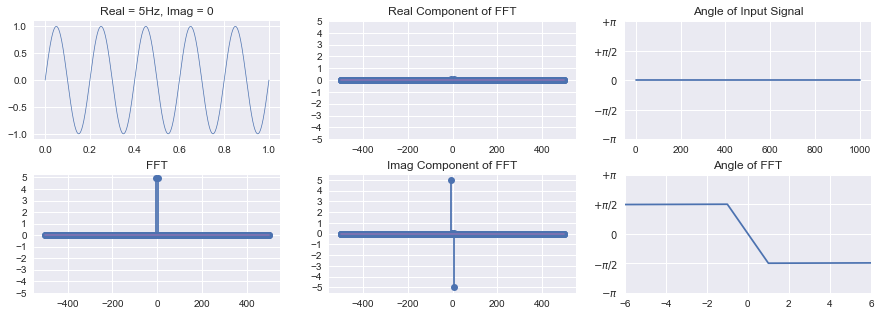

In [18]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s, linewidth = 0.7)
ax0.set_title('Real = '+ str(f1) + 'Hz, Imag = 0')

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs, (np.abs(fft1*10) / N), use_line_collection = True)
ax1.set_yticks(FFT_y_axis, minor=False)
ax1.set_title('FFT')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (fft1.real*10 / N), use_line_collection = True)
ax2.set_yticks(FFT_y_axis, minor=False)
ax2.set_title('Real Component of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs, (fft1.imag*10 / N), use_line_collection = True)
ax3.set_yticks(FFT_y_axis, minor=False)
ax3.set_title('Imag Component of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(range(N), phase(s))
ax4.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax4.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax4.set_title('Angle of Input Signal')    
    
ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(freqs, phase(fft1))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_xlim([-6,6])
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of FFT')


plt.show()

In [62]:
fft1.real[498]

0.002987617109634977

In [63]:
fft1.imag[498]

0.4754877737963923

In [64]:
fft1.imag[498]/fft1.real[498]

159.1528486910047

In [28]:
angle = np.angle(fft1)

In [45]:
angle[600]

1.8849555921535395

### 1.2. Taking FFT for a 5Hz signal (N = 100) as the imaginary component. 

In [19]:
s_i = [complex(a,b) for a,b in zip(np.zeros(N) ,s)]
fft2 = np.fft.fftshift(np.fft.fft(s_i))

y_max = max(np.ceil(np.abs(fft2*10)/N))
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)

C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


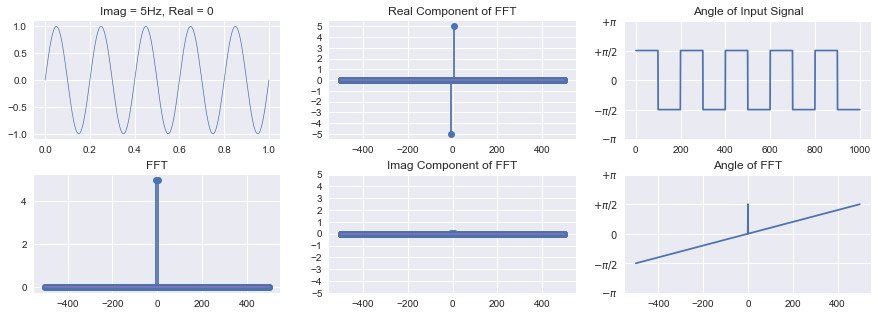

In [25]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s, linewidth = 0.7)
ax0.set_title('Imag = '+ str(f1) + 'Hz, Real = 0')

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs, (np.abs(fft2*10) / N), use_line_collection = True)
ax2.set_yticks(FFT_y_axis, minor=False)
ax1.set_title('FFT')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (fft2.real*10 / N), use_line_collection = True)
ax2.set_yticks(FFT_y_axis, minor=False)
ax2.set_title('Real Component of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs, (fft2.imag*10 / N), use_line_collection = True)
ax3.set_yticks(FFT_y_axis, minor=False)
ax3.set_title('Imag Component of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(range(N), phase(np.array(s_i)))
ax4.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax4.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax4.set_title('Angle of Input Signal')


ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(freqs, phase(fft2))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of FFT')
#ax5.set_xlim([-8,8])

plt.show()

### Conclusion: 
1. Real component is mostly positive, Imag is both positive and negative 
2. Imag component is mostly positive, Real is both positive and negative 

When the real component and the imaginary component of the input signal are interchanged: The real component and the imaginary component also interchange in the frequency spectrum 

## 2. Multiple Frequency:
### 2.1. Taking FFT for a 5Hz signal (N = 100) as the real component and 10Hz as the imaginary component. 

In [26]:
N = 100

f1 = 5
f2 = 10

t = np.linspace(0, 1, N)
s1 = np.sin(f1 * 2 * np.pi * t) 
c1 = np.sin(f2 * 2 * np.pi * t) 
com_1 = [complex(a,b) for a,b in zip(s1 ,c1)]

fft_1 = np.fft.fftshift(np.fft.fft(com_1))
freqs = np.linspace(-N/2, N/2 - 1, num=N)

y_max = max(np.ceil(np.abs(fft_1*10)/N))
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)

C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


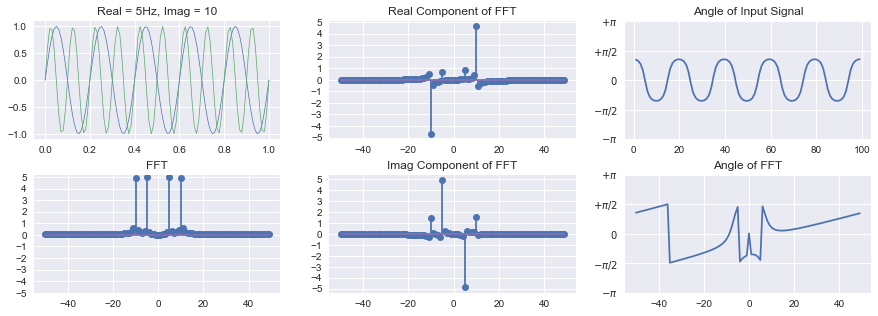

In [28]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s1, linewidth = 0.7)
ax0.plot(t, c1, linewidth = 0.7)
ax0.set_title('Real = '+ str(f1) + 'Hz, Imag = '+ str(f2))

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs, (np.abs(fft_1*10) / N), use_line_collection = True)
ax1.set_yticks(FFT_y_axis, minor=False)
ax1.set_title('FFT')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (fft_1.real*10 / N), use_line_collection = True)
ax2.set_yticks(FFT_y_axis, minor=False)
ax2.set_title('Real Component of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs, (fft_1.imag*10 / N), use_line_collection = True)
ax3.set_yticks(FFT_y_axis, minor=False)
ax3.set_title('Imag Component of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(range(N), phase(np.array(com_1)))
ax4.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax4.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax4.set_title('Angle of Input Signal')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(freqs, phase(fft_1))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of FFT')

plt.show()

In [47]:
fft_1.imag

array([-3.28431672e-01, -3.33495349e-01, -3.38640040e-01, -3.43877520e-01,
       -3.49220425e-01, -3.54682384e-01, -3.60278180e-01, -3.66023925e-01,
       -3.71937271e-01, -3.78037665e-01, -3.84346631e-01, -3.90888129e-01,
       -3.97688962e-01, -4.04779282e-01, -4.12193194e-01, -4.19969499e-01,
       -4.28152601e-01, -4.36793639e-01, -4.45951900e-01, -4.55696608e-01,
       -4.66109201e-01, -4.77286282e-01, -4.89343477e-01, -5.02420551e-01,
       -5.16688305e-01, -5.32358036e-01, -5.49694764e-01, -5.69036149e-01,
       -5.90820246e-01, -6.15627448e-01, -6.44246118e-01, -6.77779586e-01,
       -7.17829509e-01, -7.66829809e-01, -8.28703482e-01, -9.10289620e-01,
       -1.02489056e+00, -1.20297004e+00, -1.53607300e+00, -2.51122148e+00,
        1.44610587e+01,  3.91000860e-01, -5.02736003e-01, -1.18482989e+00,
       -2.66278427e+00,  4.90257380e+01,  2.15295050e+00,  9.37116657e-01,
        4.77601808e-01,  2.07314813e-01, -1.66533454e-16, -2.01245142e-01,
       -4.52579623e-01, -

In [48]:
fft_1.real

array([-1.60011316e-01, -1.49692881e-01, -1.39355538e-01, -1.28972046e-01,
       -1.18514608e-01, -1.07954548e-01, -9.72619539e-02, -8.64052941e-02,
       -7.53509872e-02, -6.40629127e-02, -5.25018454e-02, -4.06247944e-02,
       -2.83842178e-02, -1.57270808e-02, -2.59371291e-03,  1.10835947e-02,
        2.53823270e-02,  4.03919230e-02,  5.62165336e-02,  7.29785549e-02,
        9.08232094e-02,  1.09924563e-01,  1.30493542e-01,  1.52788768e-01,
        1.77131468e-01,  2.03926364e-01,  2.33691550e-01,  2.67102251e-01,
        3.05056643e-01,  3.48777898e-01,  3.99978161e-01,  4.61133205e-01,
        5.35966089e-01,  6.30352204e-01,  7.54146600e-01,  9.25253274e-01,
        1.17996617e+00,  1.60473880e+00,  2.46841598e+00,  5.23739840e+00,
       -4.67187164e+01, -4.29669463e+00, -2.27210641e+00, -1.59604707e+00,
       -1.41636755e+00,  7.12076975e+00, -1.86658245e-01, -2.28031764e-01,
       -1.69597088e-01, -9.01502745e-02, -7.93809463e-15,  1.02989788e-01,
        2.28119143e-01,  

### 2.2. Taking FFT for a 5Hz signal (N = 100) as the imaginary component and 10Hz as the real component. 

In [33]:
f_1 = 10
f_2 = 5

t = np.linspace(0, 1, N)
s2 = np.sin(f_1 * 2 * np.pi * t) 
c2 = np.sin(f_2 * 2 * np.pi * t) 
com_2 = [complex(a,b) for a,b in zip(s2 ,c2)]

fft_2 = np.fft.fftshift(np.fft.fft(com_2))

y_max = max(np.ceil(np.abs(fft_2*10)/N))
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)

C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


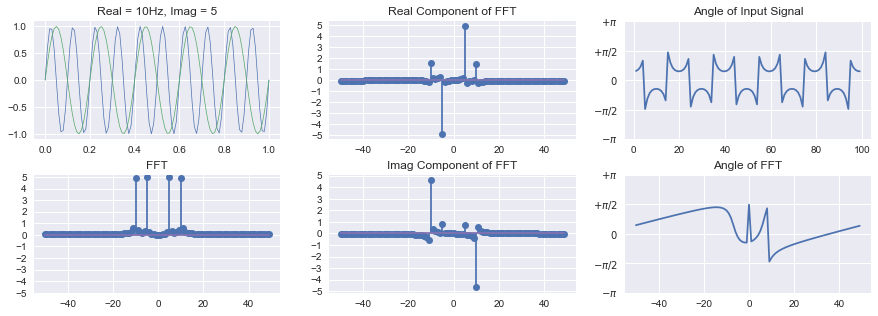

In [34]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s2, linewidth = 0.7)
ax0.plot(t, c2, linewidth = 0.7)
ax0.set_title('Real = '+ str(f_1) + 'Hz, Imag = '+ str(f_2))

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs, (np.abs(fft_2*10) / N), use_line_collection = True)
ax1.set_yticks(FFT_y_axis, minor=False)
ax1.set_title('FFT')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (fft_2.real*10 / N), use_line_collection = True)
ax2.set_yticks(FFT_y_axis, minor=False)
ax2.set_title('Real Component of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs, (fft_2.imag*10 / N), use_line_collection = True)
ax3.set_yticks(FFT_y_axis, minor=False)
ax3.set_title('Imag Component of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(range(N), phase(np.array(com_2)))
ax4.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax4.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax4.set_title('Angle of Input Signal')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(freqs, phase(fft_2))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of FFT')

plt.show()

### Conclusion: 
1. Real component is mostly positive, Imag is both positive and negative 
2. Imag component is mostly positive, Real is both positive and negative 

When the real component and the imaginary component of the input signal are interchanged: The real component and the imaginary component also interchange in the frequency spectrum 

## 3. Effects of changes in Time Domain:
### 3.1. Shifting:

In [38]:
N = 1000
f = 10

shft_f = 10

t = np.linspace(0, 1, N)
t_ = np.linspace(0, 2, 2*N)

s = np.sin(f * 2 * np.pi * t) 
s_ = np.sin(f* 2 * np.pi * t_)

fft = np.fft.fftshift(np.fft.fft(s))

s_11 = s_[shft_f: shft_f+N]

fft_11 = np.fft.fftshift(np.fft.fft(s_11))
freqs = np.linspace(-N/2, N/2 - 1, num=N)

y_max = max([max(np.ceil(np.abs(fft_11*10)/N)), max(np.ceil(np.abs(fft*10)/N))])
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)

C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


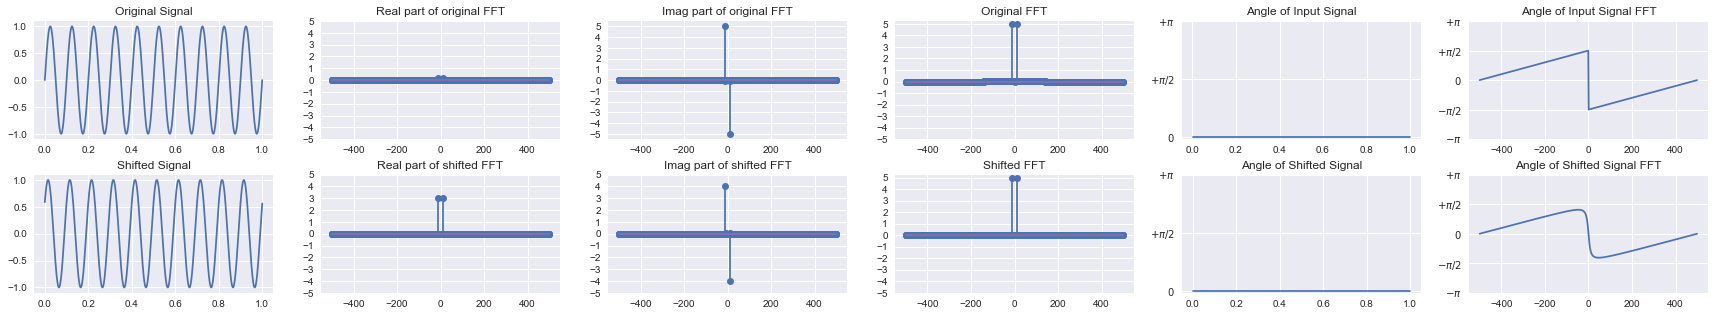

In [39]:
# Setting up the plot surface
fig = plt.figure(figsize=(30, 5))
gs = GridSpec(nrows=2, ncols=6)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s)
ax0.set_title('Original Signal')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(t, s_11)
ax1.set_title('Shifted Signal')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, fft.real*10 / N, use_line_collection = True)
ax2.set_yticks(FFT_y_axis, minor=False)
ax2.set_title('Real part of original FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs, fft_11.real*10 / N, use_line_collection = True)
ax3.set_yticks(FFT_y_axis, minor=False)
ax3.set_title('Real part of shifted FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.stem(freqs, fft.imag*10 / N, use_line_collection = True)
ax4.set_yticks(FFT_y_axis, minor=False)
ax4.set_title('Imag part of original FFT')

ax5 = fig.add_subplot(gs[1, 2])
ax5.stem(freqs, fft_11.imag*10 / N, use_line_collection = True)
ax5.set_yticks(FFT_y_axis, minor=False)
ax5.set_title('Imag part of shifted FFT')

ax6 = fig.add_subplot(gs[0, 3])
ax6.stem(freqs, np.abs(fft)*10 / N, use_line_collection = True)
ax6.set_yticks(FFT_y_axis, minor=False)
ax6.set_title('Original FFT')

ax7 = fig.add_subplot(gs[1, 3])
ax7.stem(freqs, np.abs(fft_11)*10 / N, use_line_collection = True)
ax7.set_yticks(FFT_y_axis, minor=False)
ax7.set_title('Shifted FFT')

ax8 = fig.add_subplot(gs[0, 4])
ax8.plot(t, phase(np.array(s)))
ax8.set_yticks([0, np.pi/2, np.pi], minor=False)
ax8.set_yticklabels([r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax8.set_title('Angle of Input Signal')

ax9 = fig.add_subplot(gs[1, 4])
ax9.plot(t, phase(np.array(s_11)))
ax9.set_yticks([0, np.pi/2, np.pi], minor=False)
ax9.set_yticklabels([r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax9.set_title('Angle of Shifted Signal')

ax10 = fig.add_subplot(gs[0, 5])
ax10.plot(freqs, phase(fft))
ax10.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax10.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax10.set_title('Angle of Input Signal FFT')

ax11 = fig.add_subplot(gs[1, 5])
ax11.plot(freqs, phase(fft_11))
ax11.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax11.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax11.set_title('Angle of Shifted Signal FFT')
plt.show()


In [8]:
s

array([ 0.00000000e+00,  5.92907929e-01,  9.54902241e-01,  9.45000819e-01,
        5.67059864e-01, -3.17279335e-02, -6.18158986e-01, -9.63842159e-01,
       -9.34147860e-01, -5.40640817e-01,  6.34239197e-02,  6.42787610e-01,
        9.71811568e-01,  9.22354294e-01,  5.13677392e-01, -9.50560433e-02,
       -6.66769001e-01, -9.78802446e-01, -9.09631995e-01, -4.86196736e-01,
        1.26592454e-01,  6.90079011e-01,  9.84807753e-01,  8.95993774e-01,
        4.58226522e-01, -1.58001396e-01, -7.12694171e-01, -9.89821442e-01,
       -8.81453363e-01, -4.29794912e-01,  1.89251244e-01,  7.34591709e-01,
        9.93838464e-01,  8.66025404e-01,  4.00930535e-01, -2.20310533e-01,
       -7.55749574e-01, -9.96854776e-01, -8.49725430e-01, -3.71662456e-01,
        2.51147987e-01,  7.76146464e-01,  9.98867339e-01,  8.32569855e-01,
        3.42020143e-01, -2.81732557e-01, -7.95761841e-01, -9.99874128e-01,
       -8.14575952e-01, -3.12033446e-01,  3.12033446e-01,  8.14575952e-01,
        9.99874128e-01,  

In [9]:
np.angle(s)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       0.        , 0.        , 0.        , 0.        , 0.     

### 3.2. Scaling: 

In [45]:
def rescale(arr, factor=2):
    n = len(arr)
    return np.interp(np.linspace(0, n, factor*n+1), np.arange(n), arr)

In [46]:
N = 1000
f = 10

t = np.linspace(0, 1, N)
s = np.sin(f * 2 * np.pi * t) 

fft = np.fft.fftshift(np.fft.fft(s))

scaling_f = 2
s_12 = rescale(s, scaling_f).tolist()  
fft_12 = np.fft.fftshift(np.fft.fft(s_12))
t_ = np.linspace(0, (scaling_f*N+1)/N, scaling_f*N+1)
t__ = np.linspace(0, scaling_f, scaling_f+1)

freqs = np.linspace(-N/2, N/2 - 1, num=N)
freqs_ = np.linspace(-(scaling_f*N)/2, (scaling_f*N)/2, num=scaling_f*N+1)
freqs__ = np.linspace(-(scaling_f*N)/2, (scaling_f*N)/2, num=((scaling_f*N)/100)+1) 

y_max = max([max(np.ceil(np.abs(fft_12*10)/N)), max(np.ceil(np.abs(fft*10)/N))]) + 1
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)
FFT_y_axis_l = np.linspace(-1*y_max, y_max, (2*y_max)/5+1)


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


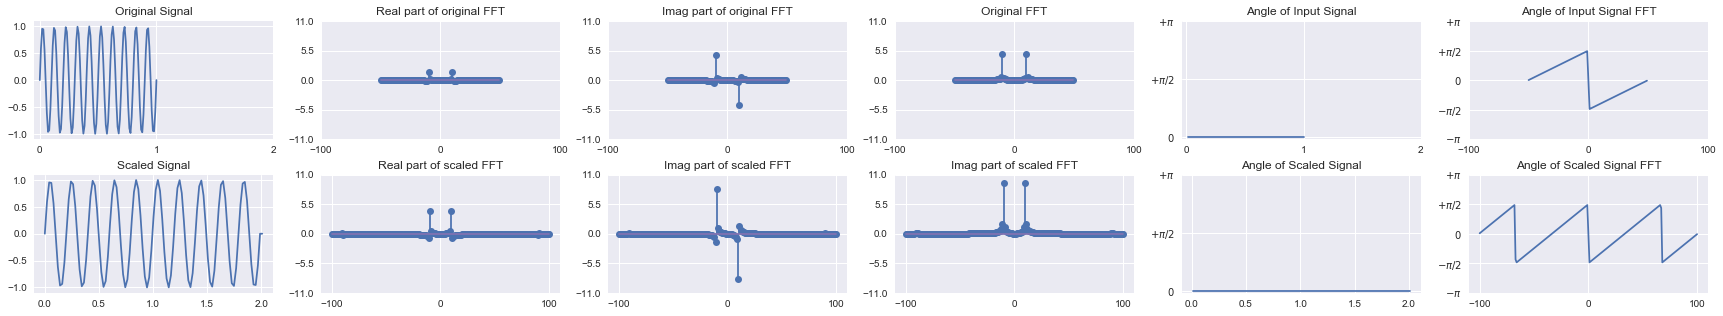

In [44]:
# Setting up the plot surface
fig = plt.figure(figsize=(30, 5))
gs = GridSpec(nrows=2, ncols=6)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s)
ax0.set_xticks(t__, minor=False)
ax0.set_title('Original Signal')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(t_, s_12)
ax1.set_title('Scaled Signal')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, fft.real*10 / N, use_line_collection = True)
ax2.set_yticks(FFT_y_axis_l, minor=False)
ax2.set_xticks(freqs__, minor=False)
ax2.set_title('Real part of original FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.stem(freqs_, fft_12.real*10 / N, use_line_collection = True)
ax3.set_yticks(FFT_y_axis_l, minor=False)
ax3.set_xticks(freqs__, minor=False)
ax3.set_title('Real part of scaled FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.stem(freqs, fft.imag*10 / N, use_line_collection = True)
ax4.set_yticks(FFT_y_axis_l, minor=False)
ax4.set_xticks(freqs__, minor=False)
ax4.set_title('Imag part of original FFT')

ax5 = fig.add_subplot(gs[1, 2])
ax5.stem(freqs_, fft_12.imag*10 / N, use_line_collection = True)
ax5.set_yticks(FFT_y_axis_l, minor=False)
ax5.set_xticks(freqs__, minor=False)
ax5.set_title('Imag part of scaled FFT')

ax6 = fig.add_subplot(gs[0, 3])
ax6.stem(freqs, np.abs(fft)*10 / N, use_line_collection = True)
ax6.set_yticks(FFT_y_axis_l, minor=False)
ax6.set_xticks(freqs__, minor=False)
ax6.set_title('Original FFT')

ax7 = fig.add_subplot(gs[1, 3])
ax7.stem(freqs_, np.abs(fft_12)*10 / N, use_line_collection = True)
ax7.set_yticks(FFT_y_axis_l, minor=False)
ax7.set_xticks(freqs__, minor=False)
ax7.set_title('Imag part of scaled FFT')

ax8 = fig.add_subplot(gs[0, 4])
ax8.plot(t, phase(np.array(s)))
ax8.set_xticks(t__, minor=False)
ax8.set_yticks([0, np.pi/2, np.pi], minor=False)
ax8.set_yticklabels([r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax8.set_title('Angle of Input Signal')

ax9 = fig.add_subplot(gs[1, 4])
ax9.plot(t_, phase(np.array(s_12)))
ax9.set_yticks([0, np.pi/2, np.pi], minor=False)
ax9.set_yticklabels([r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax9.set_title('Angle of Scaled Signal')

ax10 = fig.add_subplot(gs[0, 5])
ax10.plot(freqs, phase(fft))
ax10.set_xticks(freqs__, minor=False)
ax10.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax10.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax10.set_title('Angle of Input Signal FFT')

ax11 = fig.add_subplot(gs[1, 5])
ax11.plot(freqs_, phase(fft_12))
ax11.set_xticks(freqs__, minor=False)
ax11.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax11.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)

ax11.set_title('Angle of Scaled Signal FFT')
plt.show()

## 4. Effect of changes in Frequency domain:
### 4.1. Shifting:

In [50]:
N = 100
f = 10

fft = np.zeros(N).tolist()
fft[f] = 1
fft[-1*f] = 1

shft_f = 10
fft1 = np.zeros(N).tolist()
fft1[f+shft_f] = 1
fft1[-1*(f+shft_f)] = 1

s = np.fft.ifft(fft)
s1 = np.fft.ifft(fft1)

freqs = np.linspace(-N/2, N/2 - 1, num=N)
t = np.linspace(0, 1, N)


C:\Users\samik\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


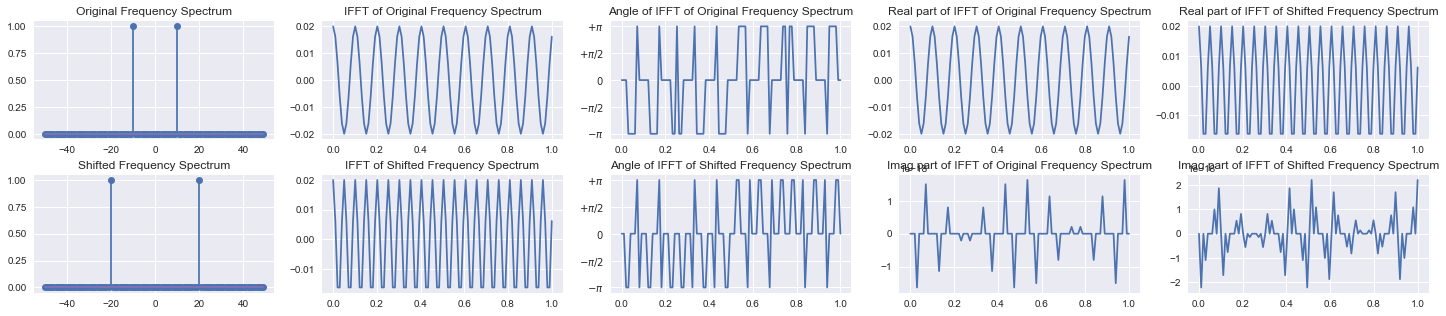

In [51]:
# Setting up the plot surface
fig = plt.figure(figsize=(25, 5))
gs = GridSpec(nrows=2, ncols=5)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.stem(freqs, np.fft.fftshift(fft), use_line_collection = True)
ax0.set_title('Original Frequency Spectrum')

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs, np.fft.fftshift(fft1), use_line_collection = True)
ax1.set_title('Shifted Frequency Spectrum')

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, s)
ax2.set_title('IFFT of Original Frequency Spectrum')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(t, s1)
ax3.set_title('IFFT of Shifted Frequency Spectrum')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(t, np.angle(s))
ax4.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax4.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax4.set_title('Angle of IFFT of Original Frequency Spectrum')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(t, np.angle(s1))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of IFFT of Shifted Frequency Spectrum')

ax6 = fig.add_subplot(gs[0, 3])
ax6.plot(t, s.real)
ax6.set_title('Real part of IFFT of Original Frequency Spectrum')

ax7 = fig.add_subplot(gs[1, 3])
ax7.plot(t, s.imag)
ax7.set_title('Imag part of IFFT of Original Frequency Spectrum')

ax8 = fig.add_subplot(gs[0, 4])
ax8.plot(t, s1.real)
ax8.set_title('Real part of IFFT of Shifted Frequency Spectrum')

ax9 = fig.add_subplot(gs[1, 4])
ax9.plot(t, s1.imag)
ax9.set_title('Imag part of IFFT of Shifted Frequency Spectrum')

plt.show()

### 4.2. Scaling:

In [52]:
N = 100
f = 10

fft = np.zeros(N).tolist()
fft[f] = 1
fft[-1*f] = 1

scaling_f = 2
fft1 = np.zeros(N*scaling_f).tolist()
fft1[f*scaling_f] = 1
fft1[-1*(f*scaling_f)] = 1

s = np.fft.ifft(fft)
s1 = np.fft.ifft(fft1)

freqs = np.linspace(-N/2, N/2 - 1, num=N)
freqs_ = np.linspace(-(scaling_f*N)/2, (scaling_f*N)/2 - 1, num=scaling_f*N)

t = np.linspace(0, 1, N)
t_ = np.linspace(0, scaling_f, N*scaling_f)
t_1 = np.linspace(0, scaling_f, scaling_f+1)

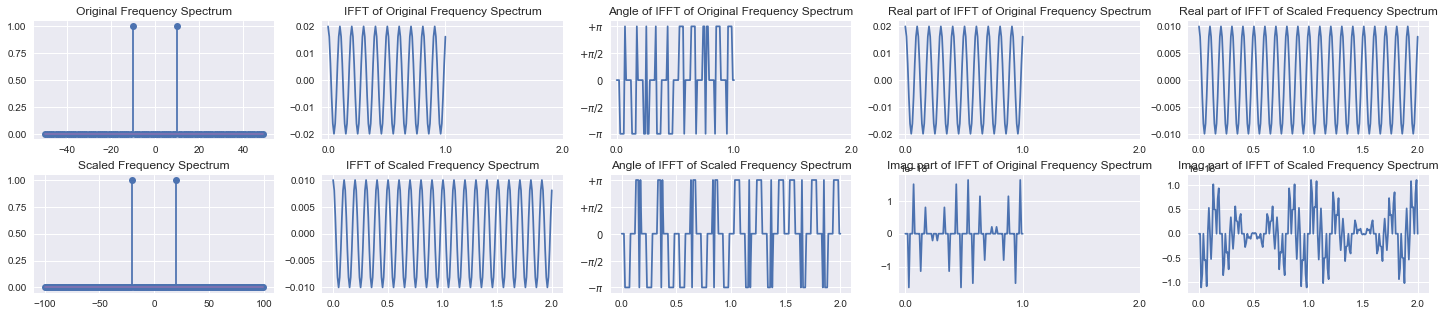

In [53]:
# Setting up the plot surface
fig = plt.figure(figsize=(25, 5))
gs = GridSpec(nrows=2, ncols=5)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.stem(freqs, np.fft.fftshift(fft), use_line_collection = True)
ax0.set_title('Original Frequency Spectrum')

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs_, np.fft.fftshift(fft1), use_line_collection = True)
ax1.set_title('Scaled Frequency Spectrum')

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, s)
ax2.set_xticks(t_1, minor=False)
ax2.set_xticklabels(t_1, fontdict=None, minor=False)
ax2.set_title('IFFT of Original Frequency Spectrum')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(t_, s1)
ax3.set_title('IFFT of Scaled Frequency Spectrum')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(t, np.angle(s))
ax4.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax4.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax4.set_xticks(t_1, minor=False)
ax4.set_xticklabels(t_1, fontdict=None, minor=False)
ax4.set_title('Angle of IFFT of Original Frequency Spectrum')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(t_, np.angle(s1))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of IFFT of Scaled Frequency Spectrum')

ax6 = fig.add_subplot(gs[0, 3])
ax6.plot(t, s.real)
ax6.set_title('Real part of IFFT of Original Frequency Spectrum')
ax6.set_xticks(t_1, minor=False)
ax6.set_xticklabels(t_1, fontdict=None, minor=False)

ax7 = fig.add_subplot(gs[1, 3])
ax7.plot(t, s.imag)
ax7.set_title('Imag part of IFFT of Original Frequency Spectrum')
ax7.set_xticks(t_1, minor=False)
ax7.set_xticklabels(t_1, fontdict=None, minor=False)

ax8 = fig.add_subplot(gs[0, 4])
ax8.plot(t_, s1.real)
ax8.set_title('Real part of IFFT of Scaled Frequency Spectrum')

ax9 = fig.add_subplot(gs[1, 4])
ax9.plot(t_, s1.imag)
ax9.set_title('Imag part of IFFT of Scaled Frequency Spectrum')

plt.show()